# Assignment 1: MA338

#### Instructions

0. Go to `File`->`Download`->`Download .ipynb`. Save it with a name as in point 2. below. And then go to `File`->`Open Notebook` and open the local version you have saved. Work directly on such version (otherwise your changes might get lost).
1. This Notebook will provide you the Tasks you have to complete, include a couple of questions, and define the necessary functions that you could use.
2. You have to submit your modified version of this Notebook to FASER. Write in the title **Assignment-1-RegNumb-#YOUR REGISTRATION NUMBER#.ipynb**
3. You can include as many extra cells as you need to make some comments (remember selecting Markdown cell instead of Code cell)
4. Adding extra (related) stuff could help with grade: For example some nice plots/drawing (you can insert images on Jupyter notebooks, but you need to attach the image in the submission).
5. This notebook will have several sections associated to different tasks you have to complete. In each one of them I will provide what functions you need to complete (for example policy evaluation, value iteration...)
6. If you prefer not to follow the suggested structure but decide to program it in a different way, you can do it, as long as you explain all the processes and complete all the tasks.
    
    

**MELEK KURU**

**Reg Number: 2315873**

In [ ]:
#remove " > /dev/null 2>&1" to see what is being installed
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python3-opengl ffmpeg --fix-missing > /dev/null 2>&1
!pip install gym.wrappers > /dev/null 2>&1
!pip install gym[toy_text] > /dev/null 2>&1 # https://www.gymlibrary.dev/environments/toy_text/

In [ ]:
!pip install pygame

#### General libraries

In [ ]:
import gym
import numpy as np # to work with mathematical formulae
import time # to reduce the speed of simulations
import random # to randomly generate data
import matplotlib.pyplot as plt # to plot

# Libraries needed to create the virtual display and record the video
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import glob
import io
import base64
import pygame
from IPython.display import HTML, clear_output # Used to clear the ouput of a Jupyter cell.

from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
pygame.init()
pygame.display.set_mode((1400, 900)) # change to the real resolution

<Surface(1400x900x32 SW)>

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env = RecordVideo(env, './video')#, force=True)
  return env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Utilities

The following functions can be useful to run the agents that you will create, as well as display the results in the notebook.

In [ ]:
## The following function will be use to evaluate the different policies.
# The environment env will define what type of grid we will use
# Agent will be defined according different policies

def run_agent(env, agent):
    state = env.reset()
    time_step = 0
    total_reward = 0
    max_iter = 100
    reward = 0;
    done = False
    while not done:
        env.render()    # this code displays the agent state and action
        time_step += 1
        action = agent.act(state);   #  we will need to define function policy(state)
        state, reward, done, info = env.step(action)  # step is defined into the environment, and it provides the new state, the reward obtained, and whether we finished or not
        total_reward += reward

        if time_step > max_iter:
          done = True
    print("Total reward:", total_reward)
    env.close()
    show_video()


In [ ]:
#This function will take an array and turn it into the grid format, and then plot the value function with a colourmap

def plot_values(VF, dimensions= (5,5), name = None):
# reshape value function according to the size of the grid (rows and columns)
    VF_grid = np.reshape(VF, dimensions)

# plot the state-value function
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(VF_grid, cmap='cool')
    fig.colorbar(im, ax=ax)   #  colourbar to indicate which is higher and lower
    if name == 'Policy':
            plt.title(name)
            plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    else:
      for (j,i),label in np.ndenumerate(VF_grid):
        ax.text(i, j, np.round(label, 2), ha='center', va='center', fontsize=14)
      plt.title(name+'-Value Function')

    plt.show()

We can try some examples for the function plot_values, so you can have an idea what it does

In [ ]:
Q = [1,3,4,6,20,4,1,5]
Q = np.array(Q)
V= 2*np.round(np.random.random_sample((16,)),2)+3

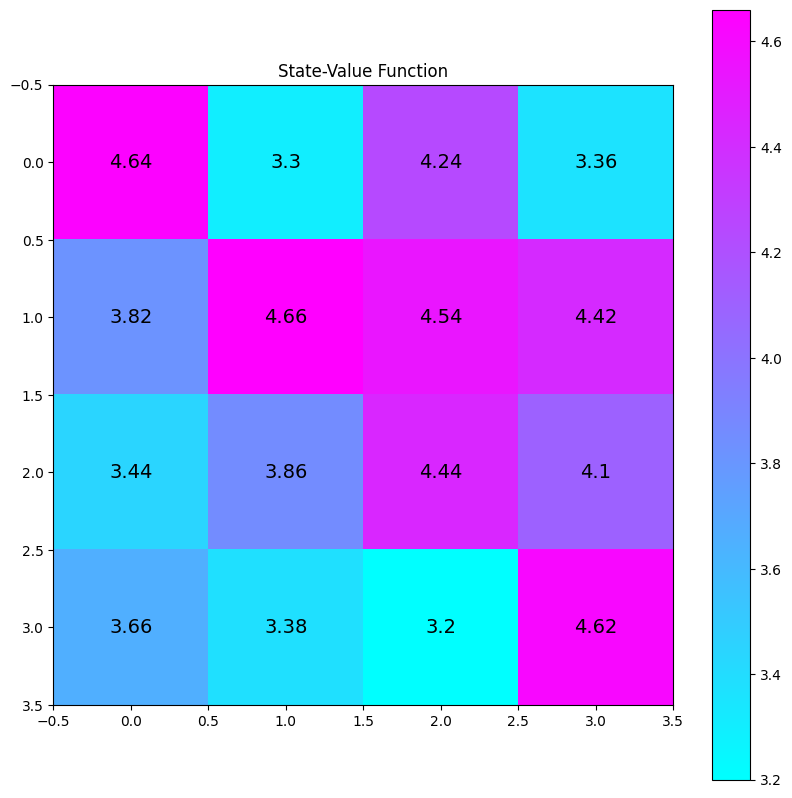

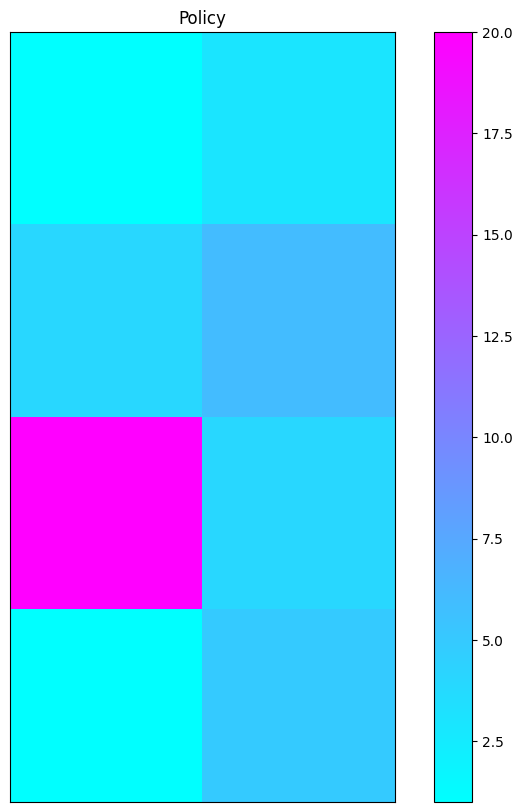

In [ ]:
plot_values(V,dimensions=(4,4), name='State')
plot_values(Q, dimensions=(4,2), name='Policy')

## Math functions in Numpy

[maths functions](https://numpy.org/doc/stable/reference/routines.math.html): In here you can find several useful mathematical functions that can be used in this notebook.

For example:
* [max](https://numpy.org/doc/stable/reference/generated/numpy.amax.html)

* [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

* [abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)


***
### Key variables in RL and OpenAI Gym

For this assignment we will explore two variants of the `FrozenLake` environment which contains a few cells with holes that once the agent step on it, it drowns and the episode finishes. We will give more details once we start working with them. In the meantime a few reminders on OpenAI Gym variables.

* __Agent__: The learner and decision maker. This is a class you should create.
* __Environment__:  What the agent interacts with. This is the variable `env` in `env = wrap_env(gym.make(version of frozenlake))`. In FrozenLake, a particularly important variable is `env.P`, which contains the Markov process model of the system. This variable encodes the state transition probabilities, rewards, and other information. The function `wrap_env()` allows to capture videos of the environment.
* __State__: A state $s \in \mathcal{S}$ is a representation of the environments current state.
* __Action__: The agent can take actions $a \in \mathcal{A}$ in order to change the state of the environment. It is an element of `env.action_space`.
* __Policy__: Rules for how the agent chooses the next action given the current state, $\pi(a|s)$ is the probability of choosing action `a` given that agent is currently in state `s`.
* __Reward__: An immediate reward $R(s,a)$ that the agent gets for taking action $a$ in state $s$. A reward depends on a state and action, so it can only be obtain through the `step` function, which in turn updates the environments state.



# Dynamic Programming



## FrozenLake 5x5 with 'bridge'.

* `S`: start point
* `G`: goal
* `F`: frozen floor (agent can walk over it)
* `H`: hole  (if agent steps on it, it sinks)



In [ ]:
FL_5x5_bridge=["SFHFF", "FHHHF", "FFFFG", "FHHHF", "FFHFF"]

In [ ]:
# Load environment
env = wrap_env(gym.make('FrozenLake-v1', desc=FL_5x5_bridge, is_slippery=False))
state = env.reset()
new_step_api=True # can be deleted, but in this case the library asks for this
print('Initial state:', state) #reminder: python starts counting from 0
print("State space:", env.observation_space) # observations and states will be the same for us in this lab
print("Action space:", env.action_space)

Initial state: 0
State space: Discrete(25)
Action space: Discrete(4)


In [ ]:
new_state, reward, done, info = env.step(1) # Take action 1 (Down)
print("New state:", new_state)
print("Reward:", reward)
print("Done:", done)

New state: 5
Reward: 0.0
Done: False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
env.step(2)

(6, 0.0, True, {'prob': 1.0, 'TimeLimit.truncated': False})

__State space__: We see that the state space contains 25 discrete states. In this case each state corresponds to a position of the agent (5x5=25 possibilities).  

State *0* is the starting point **S**, and state *14* is the goal **G**.

__Action space__: The 4 discrete actions corresponds to: 0 - Left, 1 - Down, 2 - Right, 3 - Up.

Let us consider an agent that uses a random policy: chooses at random among their actions with `env.action_space.sample()`.

In [ ]:
state = env.reset()
iterations = 0
max_iter = 100
total_reward = 0
while not done:

    env.render()
    iterations += 1
    #your agent goes here
    action = env.action_space.sample()
    # action_space.sample() selects at random one action from the action space: {0,1,2,3}
    next_state, reward, done, info = env.step(action)
    total_reward += reward


    if iterations > max_iter:
      done = True

print("Total reward:", total_reward)
env.close()
show_video()

Total reward: 0.0


We define now a uniform random agent (that does not learn, only acts)

In [ ]:
# This random agent chooses actions uniformly at random (each action is selected with probability 1/(number of actions))
class RandomAgent(object):
    def __init__(self, env):
        self.nA = env.action_space.n
        self.nS = env.observation_space.n
        self.policy = np.ones((self.nS,self.nA))/self.nA #uniform distribution per state. Note how this table is organized: nS rows, nA columns

    def act(self, state):
        # IMPORTANT: here is where we define how the probability table 'policy' is interpreted
        action = np.random.choice(self.nA, p=self.policy[state])
        return action # a uniform random action per each state


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nA = env.action_space.n
nS = env.observation_space.n
agent_uniform = RandomAgent(env) #an instantiation of an agent of the class RandomAgent


In [ ]:
agent_uniform.policy[24] #policy at state s=0, starting point

array([0.25, 0.25, 0.25, 0.25])

What we see is that each row corresponds to a given state: `s=0` corresponds to `row 0` of the table. The action probabilities at a state `s` are given by `agent_uniform.policy[s]`.<br>
Simlarly, each column corresponds to a particular action `a`. The probability that action `a` is taken at state `s` is then given by `agent_uniform.policy[s][a]`.<br>
Mathematically, we then have that ${\pi}(A = a\,| S = s) =$ `agent_uniform.policy[s][a]`.

Let us see how it performs (try it a couple of times and see what typical total rewards are obtained).

In [ ]:
#NOTE: you might need to run this cell twice if it gives an error associated to video.

pygame.init()
pygame.display.set_mode((800, 600)) # change to the real resolution
run_agent(env, agent_uniform)

Total reward: 0.0


In [ ]:
gamma=0.9

*Remark*: notice that in this grid we can easily spot the optimal policy, but a random agent struggles to find it.

# Task 1.1: Bellman Equation. [10 marks]

The following functions will help you to write the Bellman Equation for $v_{\pi}$ in a iterative way.

**Your task here is to write down the respective pseudo code for each function, or alternatively, the equations or backup diagrams associated. You can either write it directly here using LaTeX, or include an image in your submission.**

In [ ]:
def Bellman_update(env, policy, state_function,gamma):
  nS = env.observation_space.n
  nA = env.action_space.n
  V = state_function

  for s in range(nS):
    new_v = V[s]
    for a, action_proba in enumerate(policy[s]):
      for prob, next_state, reward, done in env.P[s][a]:
        new_v += action_proba * prob * (reward + gamma * V[next_state])

    V[s] = new_v
  return V

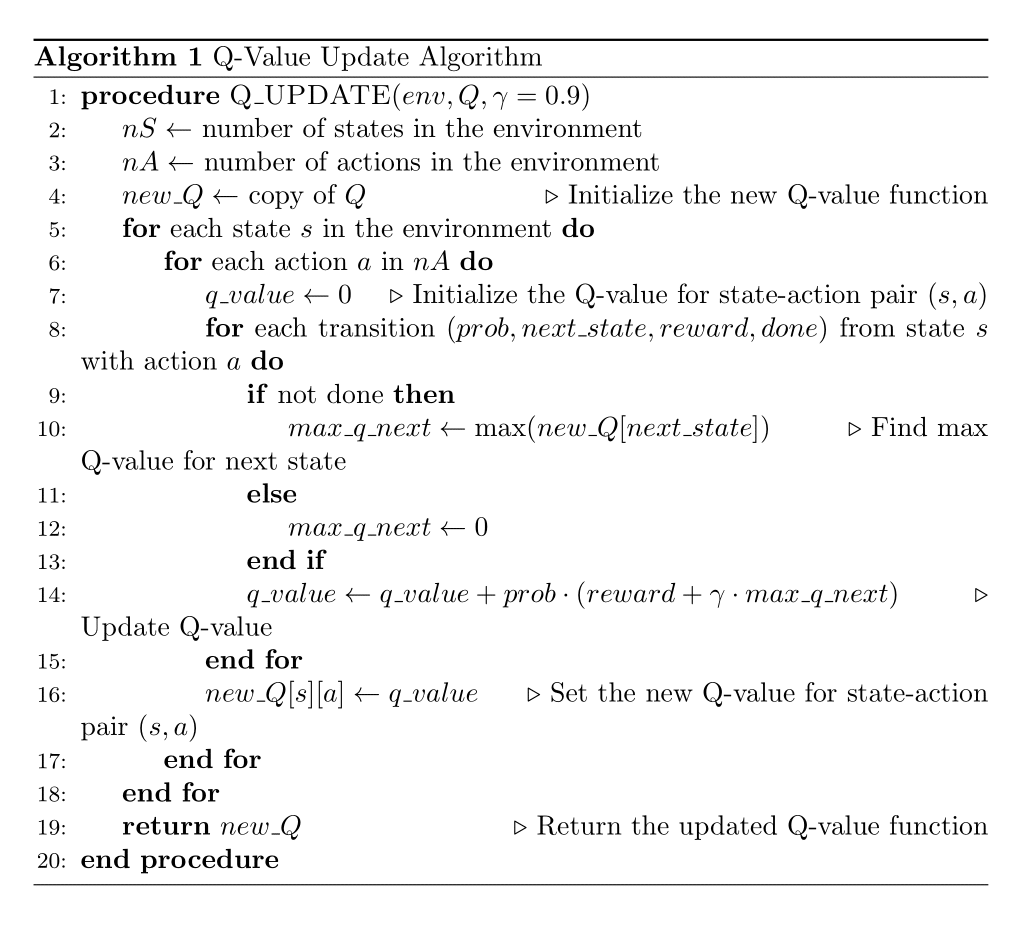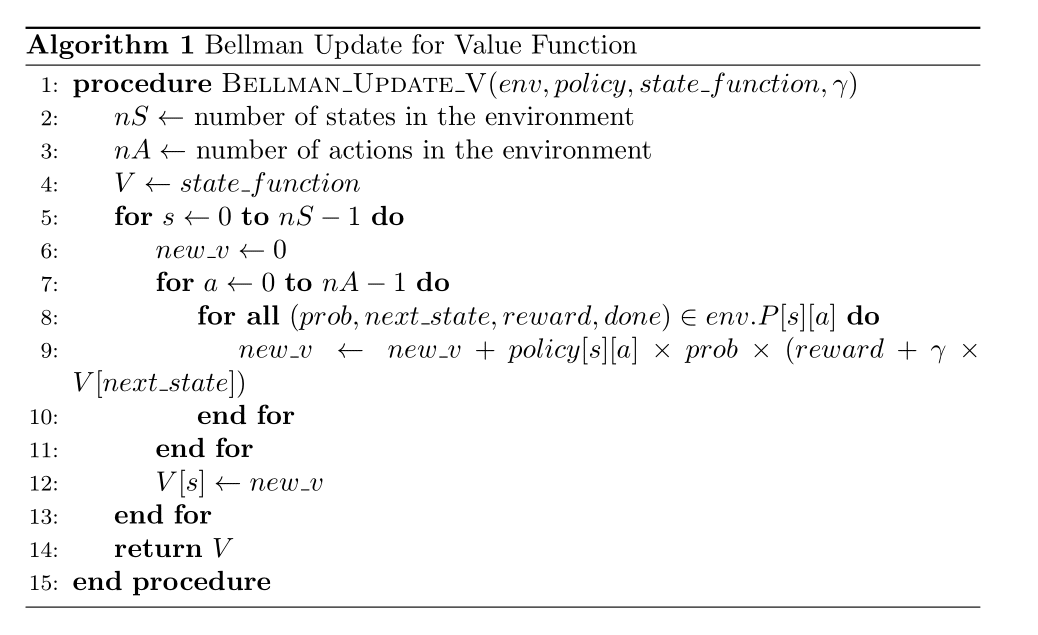

In the realm of reinforcement learning, the Bellman equations serve as foundational principles for understanding how agents learn from their environment to make optimal decisions. Two critical formulations of these equations are for the state-value function \(V(s)\) and the action-value function \(Q^{\pi}(s, a)\), each under a given policy \(\pi\).

### State-Value Function (\(V(s)\))

The state-value function \(V(s)\) estimates the expected return from state \(s\) when following policy \(\pi\). It is defined as:

$$
V(s) = \sum_{a} \pi(a|s) \sum_{s', r} P(s', r|s, a) \left[ r + \gamma V(s') \right]
$$

Here, \(V(s)\) incorporates:
- The probability \(\pi(a|s)\) of taking action \(a\) in state \(s\).
- The transition probability \(P(s', r|s, a)\), representing the likelihood of moving to state \(s'\) with reward \(r\) after action \(a\).
- The discount factor \(\gamma\), emphasizing the preference for immediate rewards over future rewards.
- The immediate reward \(r\) and the anticipated future values \(V(s')\).

This recursive nature of the Bellman equation enables the iterative refinement of \(V(s)\) towards the true value function for policy \(\pi\), assuming stable environmental dynamics and a discount factor less than 1.

### Action-Value Function (\(Q^{\pi}(s, a)\))

The action-value function \(Q^{\pi}(s, a)\) extends the state-value formulation to evaluate the expected return of taking action \(a\) in state \(s\) and following policy \(\pi\) thereafter. It is expressed as:

$$
Q^{\pi}(s, a) = \sum_{s', r} P(s', r | s, a) \left[ r + \gamma \sum_{a'} \pi(a' | s') Q^{\pi}(s', a') \right]
$$

In this equation, \(Q^{\pi}(s, a)\) includes:
- The transition and reward probabilities \(P(s', r | s, a)\).
- The discount factor \(\gamma\) and the immediate reward \(r\).
- A summation over all possible next actions \(a'\), weighted by their policy probabilities \(\pi(a' | s')\), which incorporates the future expected returns \(Q^{\pi}(s', a')\).

Both equations embody the principle of optimality inherent in dynamic programming, facilitating the agent's learning through expected rewards. By iteratively updating these values based on observed transitions and rewards, an agent can approximate the optimal policy that maximizes the cumulative reward over time.



An important remark is that `Bellman_update` returns a vector with number of coordinates equals to the number of states.

# Task 1.2: Policy Evaluation [10 marks]

The following function will compute the Iterative Policy Evaluation algorithm (*Algorithm 1* from Lecture-3-new-version: https://moodle.essex.ac.uk/pluginfile.php/2486192/mod_resource/content/2/lecture-3-new.pdf). **Your task is to complete the following function where it says `# YOUR CODE HERE`**

In [ ]:
def policy_evaluation(env, agent, old_value, max_iter, theta=1e-6):
    # old_value takes the role of the initial values for V(s) in the algorithm 1 from lecture 3.
    current_policy = agent.policy  # Input: the policy to be evaluated
    new_value = old_value  # Initialization of V(s)
    Delta = theta + 1  # Initialization
    while Delta > theta:
      Delta = 0
      max_iter = 150
      new_value = Bellman_update(env, current_policy, old_value, gamma)
      for state in range(env.observation_space.n):
        Delta = max(Delta, abs(old_value[state] - new_value[state]))  # Compute Delta for convergence
      old_value = new_value  # Update the old value function with the new values for the next iteration
    return new_value

[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.25    0.      0.      0.      0.25    0.      0.      0.      0.
 0.      0.25    0.      0.      0.      0.      0.05625]


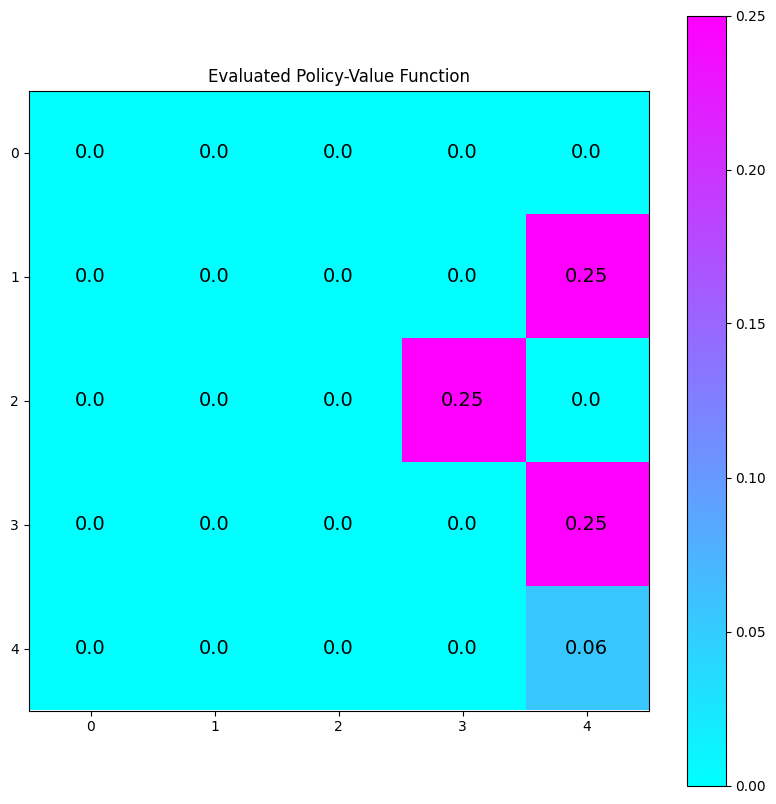

In [ ]:
# Calling the function
old_value = np.zeros(env.observation_space.n) # Initialize the old value
V = policy_evaluation(env, agent_uniform, old_value, max_iter, theta=1e-6)
print(V)
# colourmap
plot_values(V, dimensions=(5,5), name='Evaluated Policy')


# Task 1.3: Policy Improvement [10 marks]



The following function will compute a *Policy Improvement* over the current policy $\pi$.

**Your task is to write that function.** HINT: you can use the function from **Task 1.1** to create the new policy. Remember that from the Lectures (See equations (4.6) to (4.8)), you can create a new policy using the `q(s,a)` values, comparing them against the state-value functions `v(s)` (that you obtained in Task 1.2).

In [ ]:
def policy_improvement(env, agent, value_function):
    policy_stable = True  # Initialize policy stability to True

    # Iterate over all states
    for s in range(env.observation_space.n):
        q_values = np.zeros(env.action_space.n)

        # Compute q-values for each action in state s
        for a in range(env.action_space.n):
            for prob, next_state, reward, _ in env.P[s][a]:
                q_values[a] += prob * (reward + gamma * value_function[next_state])

        # Improve the policy greedily because at each state, the function selects the action with the maximum q-value
        optimal_actions = np.where(q_values == np.max(q_values))[0]

        # Check if the current policy is optimal for state s
        if np.max(q_values) > value_function[s]:
            policy_stable = False

        # Update the policy for state s with normalization
        agent.policy[s] = np.zeros(env.action_space.n)
        for a in optimal_actions:
            agent.policy[s][a] = 1 / len(optimal_actions)

    return agent.policy,policy_stable

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   1.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


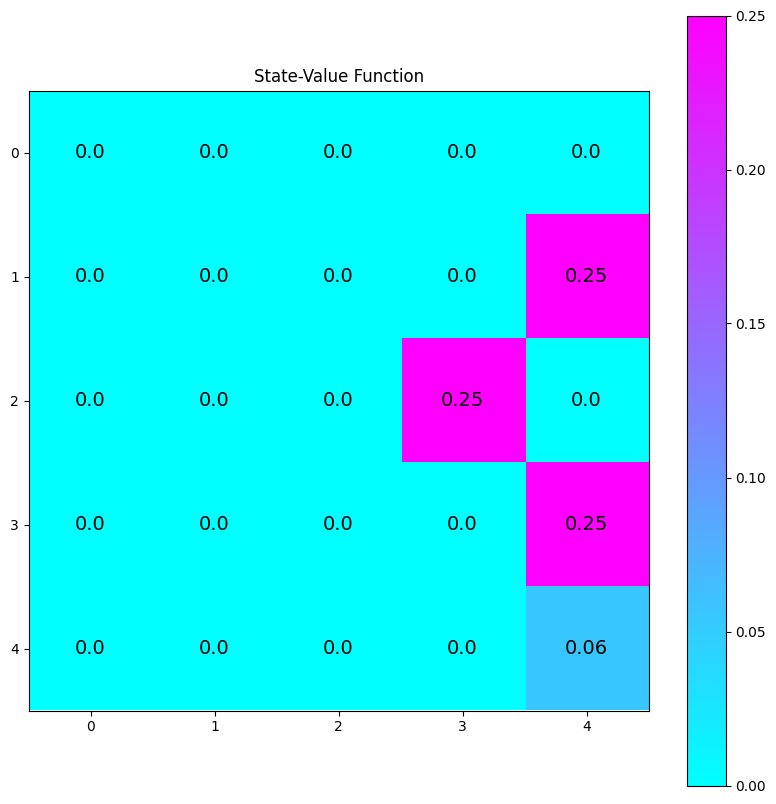

In [ ]:
#Call the function
new_policy, policy_stable = policy_improvement(env, agent_uniform, V) # value_function obtained from the policy_evaluation function above
print(new_policy)
plot_values(V, dimensions=(5,5),name='State')

**EXPLANATION FOR TASK 1.2 and TASK 1.3**

**Policy Evaluation:** This step calculates how good the current policy is. It tells us the expected rewards for each state if we follow the current policy without changing it. We are not trying to improve the policy at this stage; we just want to understand its value.

**Policy Improvement:** After evaluating, we use the information we got to make the policy better. We look at each state and decide if there is a better action to take than what the current policy suggests. If we find a better action, we update the policy to include this new action.

# Task 1.4: Policy Iteration Algorithm [15 marks]

The following function should combined both functions from  **Task 1.2** and **Task 1.3** to create a Policy Iteration Algorithm (*Algorithm 2* in Lecture-3-new-version https://moodle.essex.ac.uk/pluginfile.php/2486192/mod_resource/content/2/lecture-3-new.pdf)

**Your task is to write that function**. It should return both the Optimal Policy and the Optimal State Value Function.

You can do this in more than one cell. For example use the following function to compute the optimal state value $v$, use that to obtain the optimal action value  $q$, and with that define the optimal policy. But you also can do it in one step.

In [ ]:
def policy_iteration(env, agent, value_function, MaxIter=1000, theta=1e-6):
  #run it until no changes (tol) or until we run out of time (MaxIter)
    optimal_value_function = value_function   #initialisation
    optimal_policy = agent.policy  #  initialisation
    iter_count = 0
    Delta = 1

    while Delta > theta and iter_count < MaxIter:
        Delta = 0

        # Policy Evaluation
        while True:
            Delta = 0
            old_value_function = value_function
            for s in range(env.observation_space.n):
                new_v = 0
                for a, action_proba in enumerate(agent.policy[s]):
                    for prob, next_state, reward, _ in env.P[s][a]:
                        new_v += action_proba * prob * (reward + gamma * value_function[next_state])
                value_function[s] = new_v
                Delta = max(Delta, abs(old_value_function[s] - value_function[s]))
            if Delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_policy = agent.policy[s]
            q_values = np.zeros(env.action_space.n)
            for a in range(env.action_space.n):
                for prob, next_state, reward, _ in env.P[s][a]:
                    q_values[a] += prob * (reward + gamma * value_function[next_state])
            best_action = np.argmax(q_values)  # improve the policy greedily because at each state, the function selects the action with the maximum q-value
            agent.policy[s] = np.zeros(env.action_space.n)
            agent.policy[s][best_action] = 1

            # normalized policy (probabilities)
            agent.policy[s] = agent.policy[s] / np.sum(agent.policy[s])

            if not np.array_equal(agent.policy[s], old_policy):
                policy_stable = False

        if policy_stable:
            break

        iter_count += 1
    optimal_value_function= np.round(optimal_value_function, decimals=2)
    return optimal_policy, optimal_value_function

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
 0.  1.  0.  0.  0.  0.  0.9]


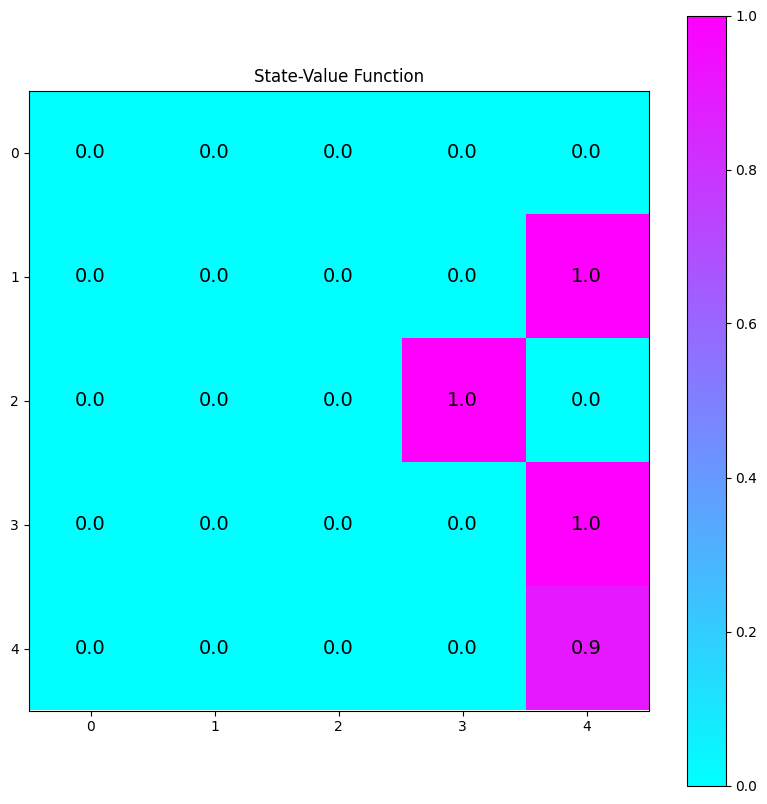

In [ ]:
# Calling policy iteration function
value_function =np.zeros(env.observation_space.n)
optimal_policy, optimal_value_function = policy_iteration(env, agent_uniform, value_function, MaxIter=200, theta=1e-6)
print(optimal_policy)
print(optimal_value_function)
plot_values(optimal_value_function, dimensions=(5,5),name='State')

# Task 1.5: Value Iteration Algorithm [15 marks]
Similar to the previous point the following function is the `Value Iteration Algorithm` (see *Algorithm 3* in Lecture-3: https://moodle.essex.ac.uk/pluginfile.php/2486192/mod_resource/content/2/lecture-3-new.pdf).

**Your task is to create that function**. The procedure should be similar to **Task 1.4** but you merged a couple of steps (sweeps) into one.  You should provide the Optimal State Function and the respective Optimal Policy.



In [ ]:
def value_iteration(env, agent, value_function, MaxIter=1000, theta=1e-6):
    old_value = value_function  # Initialisation
    optimal_policy = agent.policy  # Initialisation
    optimal_value_function = value_function  # Initialisation

    num_states = env.observation_space.n  # Get the total number of states

    for iteration in range(MaxIter):
        delta = 0  # Reset delta at the start of each iteration
        for state in range(num_states):  # Iterate over all states
            v = optimal_value_function[state]  # Store the current value of the state
            action_values = []  # List to hold the value of each action

            for action in range(env.action_space.n):  # Iterate over all actions
                action_value = 0
                for prob, next_state, reward, done in env.P[state][action]:
                    action_value += prob * (reward + gamma * optimal_value_function[next_state])
                action_values.append(action_value)

            best_action_value = max(action_values)  # Find the best action value
            delta = max(delta, abs(v - best_action_value))  # Update delta
            optimal_value_function[state] = best_action_value  # Update the value function for the state

        if delta < theta:  # Check for convergence
            break  # Exit if value function has converged

    # Find the optimal policy from the optimal value function
    optimal_policy = []
    for state in range(num_states):  # Iterate over all states
        if state in env.desc.flatten():
            optimal_policy.append(None)
            continue
        best_action = None
        best_value = float('-inf')

        for action in range(env.action_space.n):  # Iterate over all actions
            action_value = 0
            for prob, next_state, reward, done in env.P[state][action]:
                action_value += prob * (reward + gamma * optimal_value_function[next_state])
            if action_value > best_value:
                best_value = action_value
                best_action = action

        optimal_policy.append(best_action)

    agent.policy = optimal_policy  # Optionally update the agent's policy

    return optimal_policy, optimal_value_function

Optimal Policy:
[1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 3, 0, 0, 0, 3, 3, 0, 0, 2, 3]
Optimal Value Function:
[0.59049  0.531441 0.       0.81     0.9      0.6561   0.       0.
 0.       1.       0.729    0.81     0.9      1.       0.       0.6561
 0.       0.       0.       1.       0.59049  0.531441 0.       0.81
 0.9     ]


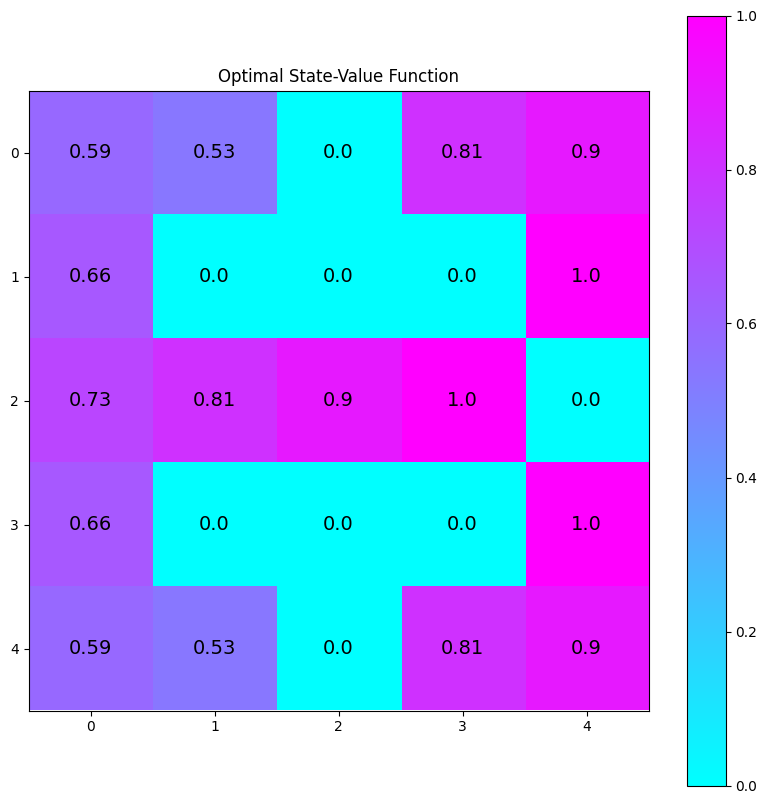

In [ ]:
value_function = np.zeros(env.observation_space.n)
optimal_policy, optimal_value_function = value_iteration(env, agent_uniform, value_function, MaxIter=200, theta=1e-6)
print("Optimal Policy:")
print(optimal_policy)
print("Optimal Value Function:")
print(optimal_value_function)
plot_values(optimal_value_function, dimensions=(5,5), name='Optimal State')

# Task 1.6 Testing FrozenLake_5x5_bridge

Now that you have created the functions is time to test them on the environment.

**Your task is to try different values of GAMMA and compare both Value Iteration and Policy Iteration on it**

Write as many comments as you consider necessary, include some plots (for example use the function `plot_values` to display the state and action value functions)

In [ ]:
# Load environment
env_bridge = wrap_env(gym.make('FrozenLake-v1', desc=FL_5x5_bridge, is_slippery=False))
state = env_bridge.reset()
new_step_api=True # can be deleted, but in this case the library asks for this
print('Initial state:', state) #reminder: python starts counting from 0
print("State space:", env_bridge.observation_space) # observations and states will be the same for us in this lab
print("Action space:", env_bridge.action_space)

Initial state: 0
State space: Discrete(25)
Action space: Discrete(4)


In [ ]:
nS_bridge = env_bridge.observation_space.n
nA_bridge = env_bridge.action_space.n
agent_bridge_1 = RandomAgent(env_bridge) #an instantiation of an agent of the class RandomAgent

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Values of GAMMA**

My optimal policy is displayed above when gamma = 0.9 (close to 1) in this case, the agent takes into account all future rewards up to termination, whereas when gamma = 0.1, for example, the agent considers the mostly immediate rewards as in the attached image the propabilities just around the goal without any clear insights about the policy. I tried the codes from task 1 to task 5 twice by changing the gamma value to be 0.1 and 0.5 (low and middle values).The values at each state and the policy also improved at gamma = 0.5 (middle range) compared to gamma = 0.1. Thus, the agent takes into account reward values in multiple future states in addition to the current one.The agent should take into account the rewards of all subsequent states if the gamma value is higher. This encourages further exploration and improvement of the policy and state values.



## Task 1.6.1. [10 marks]

Improve `agent_bridge` policy using POLICY iteration algorithm (algorithm from Task 1.4) and run the improved agent again (you can do many runs to observe the improvement step by step).

Return the `optimal_value_function` and `optimal_policy` of this improved agent.

In [ ]:
value_function_0 = np.zeros(nS_bridge)
optimal_policy, optimal_value_function = policy_iteration(env_bridge, agent_bridge_1, value_function_0, MaxIter=150, theta=1e-6)

Run the following cell to display the optimal values of `agent_bridge_1` improved policy.

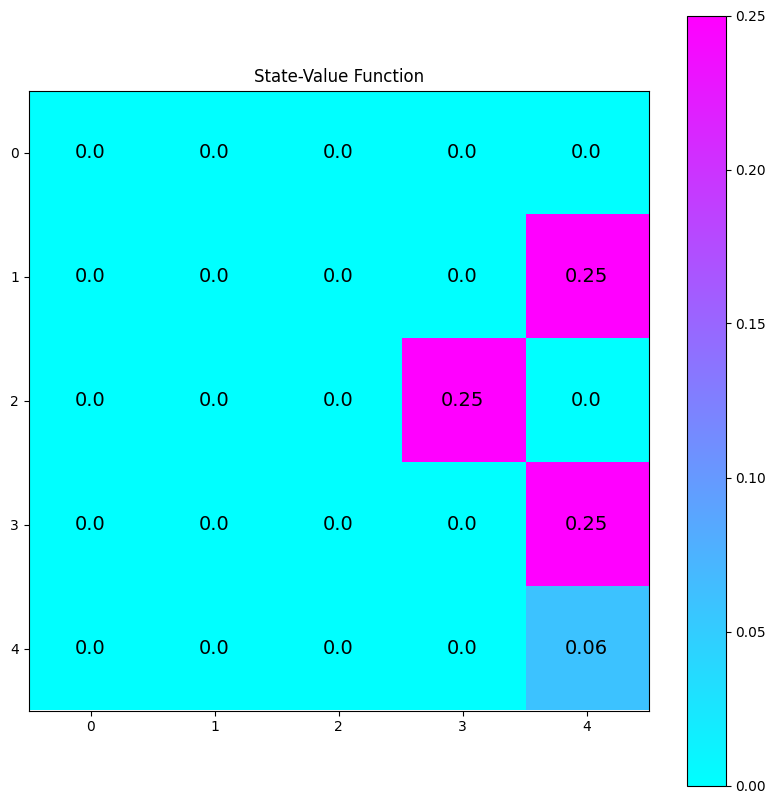

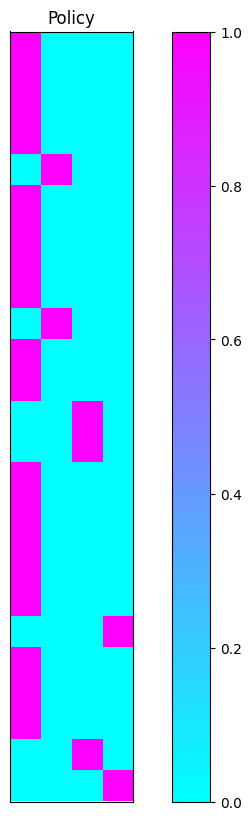

In [ ]:
plot_values(optimal_value_function, dimensions=(5,5), name='State')
plot_values(optimal_policy, dimensions=(nS_bridge, nA_bridge), name = 'Policy')

If everything is correctly implemented, then the following code should run the `agent_bridge_1` that is able to find the `goal`.

In [ ]:
#NOTE: you might need to run this cell twice if it gives an error associated to video.

pygame.init()
pygame.display.set_mode((800, 600)) # change to the real resolution
run_agent(env_bridge, agent_bridge_1)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total reward: 0.0


## Task 1.6.2. [10 marks]

Create a different agent, `agent_bridge_2` initialised as an uniform random agent, and then improve its policy using VALUE iteration algoritm (from Task 1.5).

Run the new agent and return its optimal value function and optimal policy.

In [ ]:
agent_bridge_2 = RandomAgent(env_bridge)


In [ ]:
value_function_0 = np.zeros(nS_bridge)
optimal_policy_2, optimal_value_function_2 = value_iteration(env_bridge, agent_bridge_2, value_function_0, MaxIter=1000, theta=1e-6)

Run the following cell to display the optimal values of `agent_bridge_2` improved policy.

If everything is correctly implemented, then the following code should run the `agent_bridge_2` that is able to find the `goal`.

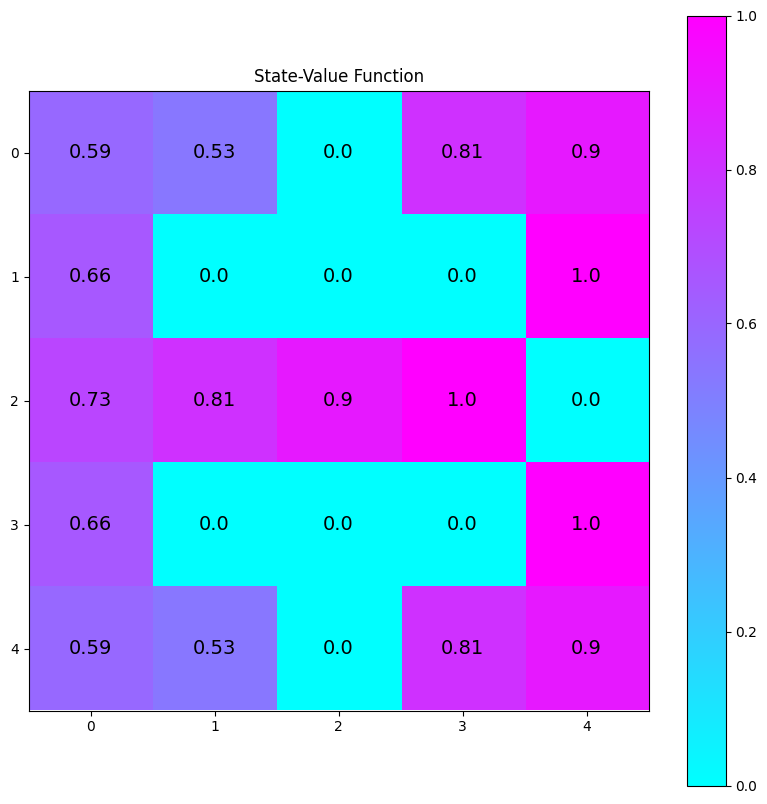

In [ ]:
plot_values(optimal_value_function_2, dimensions=(5,5), name='State')
#plot_values(optimal_policy_2, dimensions=(nS_bridge, nA_bridge), name='Policy')

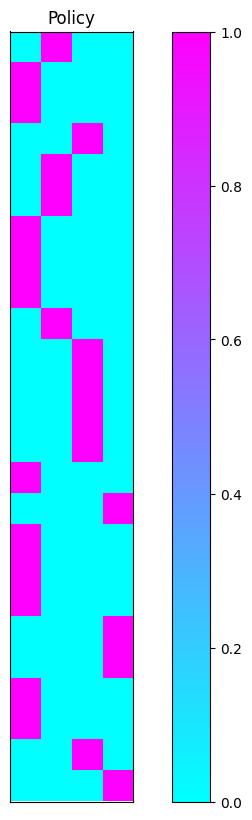

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_policy(policy_vector, num_states, num_actions):
    # One-hot encode the policy vector to a policy matrix
    policy_matrix = np.zeros((num_states, num_actions))
    for i, action in enumerate(policy_vector):
        if action is not None:  # None değerleri atla
            policy_matrix[i, action] = 1

    # Şimdi policy_matrix'i plot_values fonksiyonu ile çizebilirsiniz
    plot_values(policy_matrix, dimensions=(num_states, num_actions), name='Policy')

# Fonksiyonu kullanarak optimal_policy_2 vektörünü çizin
plot_policy(optimal_policy_2, nS_bridge, nA_bridge)

In [ ]:
#NOTE: you might need to run this cell twice if it gives an error associated to video.
pygame.init()
pygame.display.set_mode((800, 600)) # change to the real resolution
#run_agent(env_bridge, agent_bridge_2)

<Surface(800x600x32 SW)>

**Question** Can you measure which method find the optimal policy faster? (if any) **[extra 10 marks]**

# Larger Frozen Lake environment

In [ ]:
FL_15x9=["FFHHFHFFFGFFHHF","FFFFFFFFHFHFFFF","FHFFHHHFFFHHFFF","FFFFHFFFFFFHFFF","FGFFHFFSFFFHGFH","HHFFFFHFHFFFFFH","FFFHFFFFFFFFFFH","HHFFFFFHFFFFHFF","FFHHFFFFGHHFFFF"]

In [ ]:
# Load environment
env_large_FL = wrap_env(gym.make('FrozenLake-v1', desc=FL_15x9))
state = env_large_FL.reset()
new_step_api=True # can be deleted, but in this case the library asks for this
print('Initial state:', state) #reminder: python starts counting from 0
print("State space:", env_large_FL.observation_space) # observations and states will be the same for us in this lab
print("Action space:", env_large_FL.action_space)

Initial state: 67
State space: Discrete(135)
Action space: Discrete(4)


In [ ]:
agent_large_FL = RandomAgent(env_large_FL)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pygame.init()
pygame.display.set_mode((1400, 900)) # change to the real resolution
run_agent(env_large_FL, agent_large_FL)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total reward: 0.0


In [ ]:
done = False
state = env_large_FL.reset()
iterations = 0
max_iter = 100
total_reward = 0
pygame.init()
pygame.display.set_mode((1400, 900))
while not done:

    env_large_FL.render()
    iterations += 1
    #your agent goes here
    action = env_large_FL.action_space.sample()
    # action_space.sample() selects at random one action from the action space: {0,1,2,3}
    next_state, reward, done, info = env_large_FL.step(action)
    total_reward += reward


    if iterations > max_iter:
      done = True

print("Total reward:", total_reward)
env_large_FL.close()
show_video()

Total reward: 0.0


# Task 1.7 Testing Frozen Lake Large Environment [20 marks]

Similar to the case of GridWorld, **your task improve the policy of Agent_Large_FL_2 and Agent_Large_FL_3 using  Policy Iteration and Value Iteration, respectively**.

Repeat the same procedure as in Tasks 1.6.1 (evaluate policy iteration) and 1.6.2 (evaluate value iteration)

Play around with the parameters (GAMMA, MaxIter) to see if they have any effect on avoiding the death of your agent.

In [ ]:
agent_Large_FL_2 = RandomAgent(env_large_FL) # same as 1.6.1 and 1.6.2 # but with larger environment # copy the above
nS_FL2 = env_large_FL.observation_space.n
nA_FL2 = env_large_FL.action_space.n
value_function_FL2 = np.zeros(nS_FL2)
optimal_policy, optimal_value_function = policy_iteration(env_large_FL, agent_Large_FL_2, value_function_FL2, MaxIter=1000,theta=1e-6)

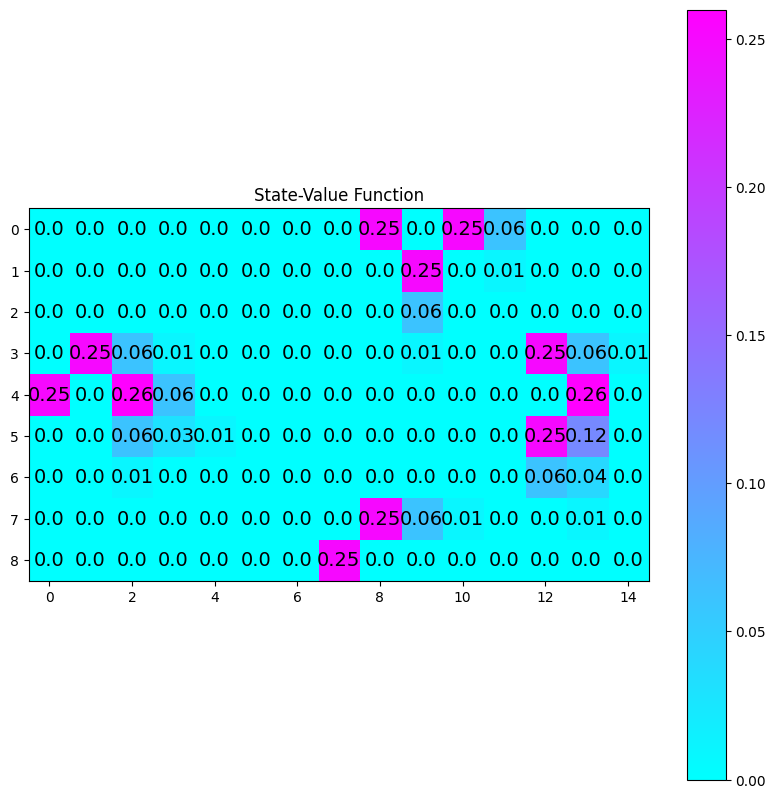

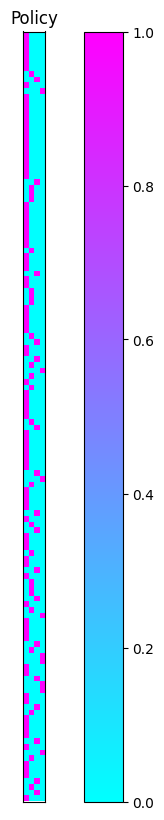

In [ ]:
plot_values(optimal_value_function, dimensions=(9,15), name='State')
plot_values(optimal_policy, dimensions=(nS_FL2, nA_FL2), name='Policy')

In [ ]:
pygame.init()
pygame.display.set_mode((800, 600)) # change to the real resolution
run_agent(env_large_FL, agent_Large_FL_2)

Total reward: 0.0


In [ ]:
# Apply Policy Iteration
optimal_policy, optimal_value_function = policy_iteration(env_large_FL, agent_Large_FL_2, gamma, theta=1e-6)
# Update your plotting and agent running logic accordingly


TypeError: 'float' object is not subscriptable

Retrieve Agent3's optimal policy and value function and plot them using the below cell.

In [ ]:
agent_Large_FL_3 = RandomAgent(env_large_FL)
agent_Large_FL_3 = RandomAgent(env_large_FL)
optimal_policy_2, optimal_value_function_2 = value_iteration(env_large_FL, agent_Large_FL_3, value_function_FL2, MaxIter=200,theta=1e-6)

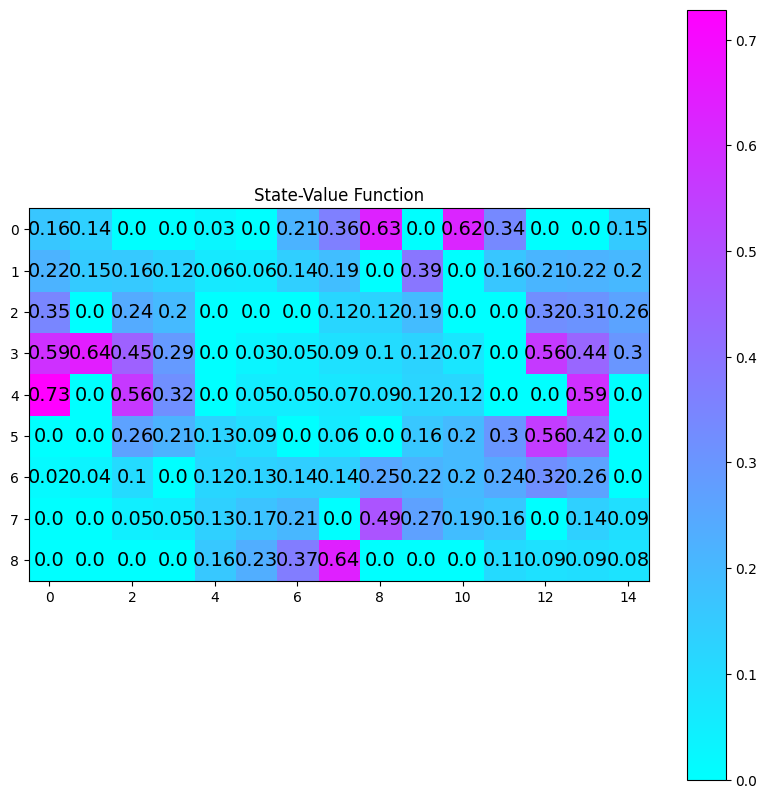

In [ ]:
plot_values(optimal_value_function_2, dimensions=(9,15), name='State')
#plot_values(optimal_policy_2, dimensions=(nS_FL2, nA_FL2), name = 'Policy')

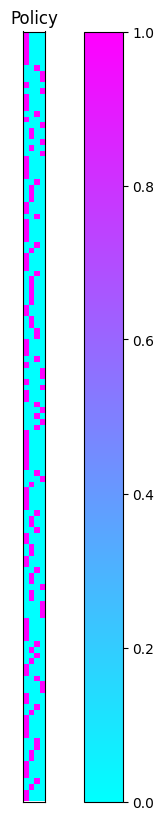

In [ ]:
def plot_policy2(policy_vector, num_states, num_actions):
    policy_matrix = np.zeros((num_states, num_actions))
    for i, action in enumerate(policy_vector):
        if action is not None:
            policy_matrix[i, action] = 1
    plot_values(policy_matrix, dimensions=(num_states, num_actions), name='Policy')
plot_policy(optimal_policy_2,nS_FL2,nA_FL2)

In [ ]:
#NOTE: you might need to run this cell twice if it gives an error associated to video.
pygame.init()
pygame.display.set_mode((800, 600)) # change to the real resolution
#run_agent(env_large_FL, agent_Large_FL_3)# This line does not work with me it gives me error

<Surface(800x600x32 SW)>